In [8]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import operator
#import scipy
from scipy.special import expit

#### STEP 1
# Importing data
xtrain = pd.read_csv("trainMatrixModified.txt", header=None, sep='\t')
ytrain = pd.read_csv("trainClasses.txt", header=None, sep='\t', index_col=0)
xtest = pd.read_csv("testMatrixModified.txt", header=None, sep='\t')
ytest = pd.read_csv("testClasses.txt", header=None, sep='\t', index_col=0)

xtrain.shape

(5500, 800)

In [9]:
# Convert to numpy matrix
xtrain = xtrain.values
ytrain = ytrain.values
xtest = xtest.values
ytest = ytest.values

# Defining a function which calculates euclidean distance between two data points
def euclidean_distance_vectorized(xtrain, x):
    diff = np.zeros(xtrain.shape)
    for i in range(xtrain.shape[1]):
        diff[:,i] = xtrain[:,i] - x
    return np.sum(diff**2, axis=0)

def get_nearest_neighbours(dists, count):
    return dists.argsort()[:count]

# Predicted class
def predict_class(nn_classes):
    class_count = {}
    for c in nn_classes:
        if c in class_count:
            class_count[c] += 1
        else:
            class_count[c] = 1

    prediction = -1
    prediction_count = -1
    for k in class_count.keys():
        if class_count[k] > prediction_count:
            prediction_count = class_count[k]
            prediction = k

    return prediction

def predict(x, xtrain, K, dist_func=euclidean_distance_vectorized):
    global dists
    dists = dist_func(xtrain, x)
    idx_nn = get_nearest_neighbours(dists, K)

    nn_classes = ytrain[idx_nn].reshape(K)
    return predict_class(nn_classes)

K = 5
predictions = []
for i in range(xtest.shape[1]):
    x = xtest[:, i]
    global pred
    pred = predict(x, xtrain, K, euclidean_distance_vectorized)
    predictions.append(pred)

predictions = np.array(predictions).reshape(ytest.shape)
accuracy = np.mean(predictions == ytest)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.815


In [10]:
#accuracy for testset
K_arr = np.arange(1,20,2)
Acc=[]
Pred=[]

for j in range(len(K_arr)):
    predictions = []
    for i in range(xtest.shape[1]):
        x = xtest[:, i]
        pred = predict(x, xtrain, K_arr[j], euclidean_distance_vectorized)
        predictions.append(pred)
        Pred.append(pred)
    predictions = np.array(predictions).reshape(ytest.shape)
    accuracy = np.mean(predictions == ytest)
    Acc.append(accuracy)
Acc

[0.78, 0.81, 0.815, 0.765, 0.75, 0.795, 0.775, 0.785, 0.76, 0.74]

In [12]:
#accuracy for trainset
from sklearn.metrics import mean_absolute_error

K_arr = np.arange(1,20,2)
MAETR_arr=np.zeros(len(K_arr))
Ac=[]
AcP=[]

for j in range(len(K_arr)):
    predictions1 = []
    for i in range(xtrain.shape[1]):
        x = xtrain[:, i]
        pred1 = predict(x, xtrain, K_arr[j], euclidean_distance_vectorized)
        predictions1.append(pred1)
    predictions1 = np.array(predictions1).reshape(ytrain.shape)
    accuracy = np.mean(predictions1 == ytrain)
    Ac.append(accuracy)
    AcP.append(1-accuracy)
    MAETR = mean_absolute_error(ytrain, predictions1)
    MAETR_arr[j]=MAETR

AcP 

### MAETR= MAE for trainset

[0.0,
 0.01375000000000004,
 0.043749999999999956,
 0.10499999999999998,
 0.15125,
 0.10375000000000001,
 0.10750000000000004,
 0.11250000000000004,
 0.14125,
 0.15625]

In [13]:
########################################################################
# confusion matrix
def conf_mat(ytest ,predictions):
        conf_arr = [[0, 0], [0, 0]]

        for i in range(len(ytest)):
                if int(predictions[i]) == 0:
                        if float(ytest[i]) < 0.5:
                                conf_arr[0][0] = conf_arr[0][0] + 1
                        else:
                                conf_arr[1][0] = conf_arr[1][0] + 1
                elif int(predictions[i]) == 1:
                        if float(ytest[i]) >= 0.5:
                                conf_arr[1][1] = conf_arr[1][1] +1
                        else:
                                conf_arr[0][1] = conf_arr[0][1] +1
        global accuracy
        accuracy = float(conf_arr[0][0] + conf_arr[1][1])/(len(predictions))
        
        global precision
        precision = float(conf_arr[0][0]/(conf_arr[0][0]+conf_arr[1][0]))
                     
        global recall
        recall = float(conf_arr[0][0]/(conf_arr[0][0]+conf_arr[0][1]))
        print("[", conf_arr[0],"\n", conf_arr[1],"]")

print ('Confusion Matrix :')
conf_mat(ytest, predictions)

print ("Report:" "\n")
print("Accuracy: {}".format(accuracy))
print("recall: {0:.2f}".format(recall))
print("precision :{0:.2f}".format(precision))

#confusion matrix for k=19\for example

F_score = (2*precision*recall)/ (precision + recall)
F_score

Confusion Matrix :
[ [99, 0] 
 [52, 49] ]
Report:

Accuracy: 0.74
recall: 1.00
precision :0.66


0.792

In [ ]:
from sklearn.metrics import mean_absolute_error

K_arr = np.arange(1,20,2)
Acc_arr=np.zeros(len(K_arr))
Pred_arr=np.zeros((len(K_arr), xtest.shape[1]))
Prec_arr=np.zeros(len(K_arr))
Rcll_arr=np.zeros(len(K_arr))
Acc1_arr=np.zeros(len(K_arr))
MAETS_arr=np.zeros(len(K_arr))

for j in range(len(K_arr)):
    predictions = []
    for i in range(xtest.shape[1]):
        x = xtest[:, i]
        pred = predict(x, xtrain, K_arr[j], euclidean_distance_vectorized)
        predictions.append(pred)
        Pred_arr[j][i]=pred
    
    predictions = np.array(predictions).reshape(ytest.shape)
    accuracy1 = np.mean(predictions == ytest)
    Acc1_arr[j]=accuracy1
    MAETS = mean_absolute_error(ytest, predictions)
    
    conf_mat(ytest, predictions)
    Rcll_arr[j]=recall
    Prec_arr[j]=precision
    #Acc_arr[j]=accuracy
    MAETS_arr[j]=MAETS
    
## Acc_arr=Acc
## MAETS= MAE for testset

[ [58, 41] 
 [3, 98] ]
[ [79, 20] 
 [18, 83] ]
[ [99, 0] 
 [37, 64] ]
[ [99, 0] 
 [47, 54] ]
[ [99, 0] 
 [50, 51] ]
[ [99, 0] 
 [41, 60] ]
[ [99, 0] 
 [45, 56] ]


In [ ]:
print(Rcll_arr)
print(Prec_arr)
print(Acc_arr)
print(MAETS_arr)
print(MAETR_arr)

Text(0, 0.5, 'Accuracy')

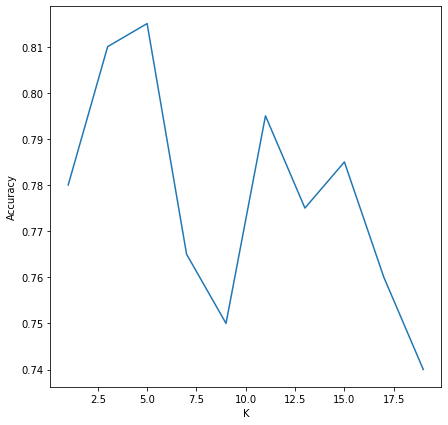

In [32]:
#plot accuracy and K
fig= plt.figure(figsize=(7,7))
plt.plot(K_arr,Acc)

plt.xlabel("K")
plt.ylabel("Accuracy")

Text(0.5, 1.0, 'Test error')

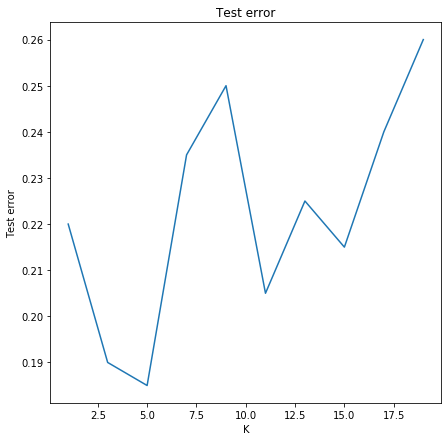

In [60]:
#plot test error and K
fig= plt.figure(figsize=(7,7))
plt.plot(K_arr,MAETS_arr)

plt.xlabel("K")
plt.ylabel("Test error")
plt.title('Test error')

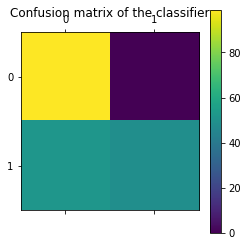

In [34]:
############################################################
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(ytest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

Text(0, 0.5, 'recall')

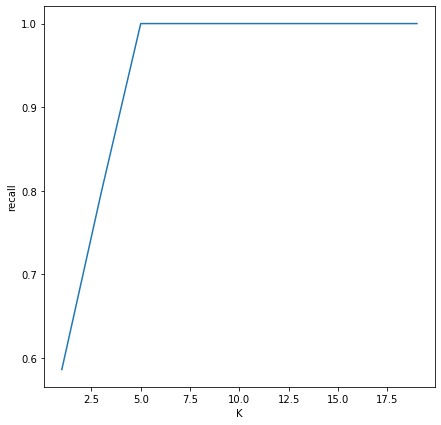

In [36]:
#plot recall and K
fig= plt.figure(figsize=(7,7))
plt.plot(K_arr,Rcll_arr)

plt.xlabel("K")
plt.ylabel("recall")

Text(0, 0.5, 'precision')

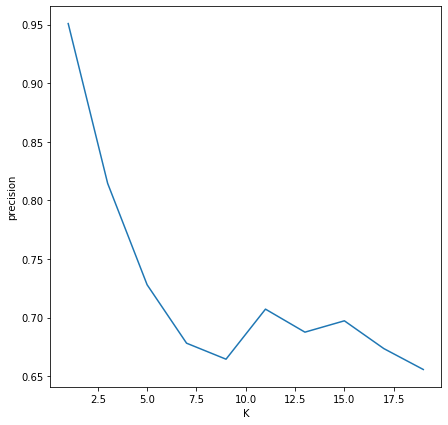

In [58]:
#plot precision and K
fig= plt.figure(figsize=(7,7))
plt.plot(K_arr,Prec_arr)

plt.xlabel("K")
plt.ylabel("precision")

Text(0.5, 1.0, 'Training error')

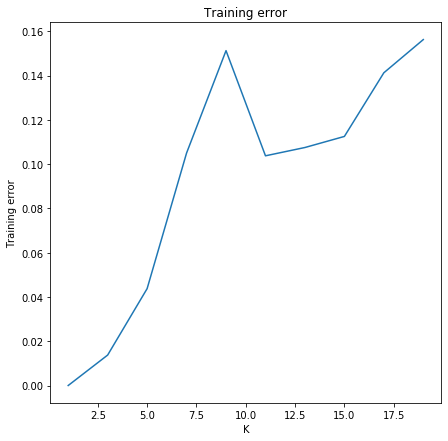

In [63]:
#plot training error and K
fig= plt.figure(figsize=(7,7))
plt.plot(K_arr,MAETR_arr)

plt.xlabel("K")
plt.ylabel("Training error")
plt.title('Training error')